In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def pi1(q1, q2):
    return np.exp(q1) / (np.exp(q1) + np.exp(q2))

def pi2(q1, q2):
    return np.exp(q2) / (np.exp(q1) + np.exp(q2))

# Initial values (using float type for consistency)
initial_values = {
    'P_S_00': 0.2,
    'P_S_01': 0.2,
    'P_S_10': 0.2,
    'P_S_11': 0.2,
    'P_I_00': 0.05,
    'P_I_01': 0.05,
    'P_I_10': 0.05,
    'P_I_11': 0.05,
    'P_R_00': 0.0,
    'P_R_01': 0.0,
    'P_R_10': 0.0,
    'P_R_11': 0.0
}

beta1, beta2 = 0.4, 0.5
gamma = 0.15

# Equations for updating proportions
def update_proportions_S(row):
    row['P_S_00'] = row['P_S_00'] + (row['P_S_00'] * (-row['P_S_01']) - row['P_S_10'] - row['P_S_11'] - row['P_I_00'] * (pi1(0, 0) * beta1 + pi2(0, 0) * beta2) - (pi1(0, 0) + pi2(0, 0)) * (row['P_I_01'] + row['P_I_10'] + row['P_I_11']) - row['P_R_01'] - row['P_R_10'] - row['P_R_11'])
    row['P_S_01'] = row['P_S_01'] + (row['P_S_01'] * (-row['P_S_00']) - row['P_S_10'] - row['P_S_11'] - row['P_I_01'] * (pi1(0, 1) * beta1 + pi2(0, 1) * beta2) - (pi1(0, 1) + pi2(0, 1)) * (row['P_I_00'] + row['P_I_10'] + row['P_I_11']) - row['P_R_00'] - row['P_R_10'] - row['P_R_11'])
    row['P_S_10'] = row['P_S_10'] + (row['P_S_10'] * (-row['P_S_01']) - row['P_S_00'] - row['P_S_11'] - row['P_I_10'] * (pi1(1, 0) * beta1 + pi2(1, 0) * beta2) - (pi1(1, 0) + pi2(1, 0)) * (row['P_I_01'] + row['P_I_00'] + row['P_I_11']) - row['P_R_01'] - row['P_R_00'] - row['P_R_11'])
    row['P_S_11'] = row['P_S_11'] + (row['P_S_11'] * (-row['P_S_01']) - row['P_S_10'] - row['P_S_00'] - row['P_I_11'] * (pi1(1, 1) * beta1 + pi2(1, 1) * beta2) - (pi1(1, 1) + pi2(1, 1)) * (row['P_I_01'] + row['P_I_10'] + row['P_I_00']) - row['P_R_01'] - row['P_R_10'] - row['P_R_00'])
    return row

def update_proportions_I(row):
    row['P_I_00'] = row['P_I_00'] + (row['P_I_00'] * (-row['P_I_00']) * gamma - row['P_I_01'] - row['P_I_10'] - row['P_I_11'] - row['P_S_00'] * gamma - row['P_S_01'] - row['P_S_10'] - row['P_S_11'] - row['P_R_00'] * gamma - row['P_R_01'] - row['P_R_10'] - row['P_R_11'])
    row['P_I_01'] = row['P_I_01'] + (row['P_I_01'] * (-row['P_I_01']) * gamma - row['P_I_00'] - row['P_I_10'] - row['P_I_11'] - row['P_S_01'] * gamma - row['P_S_00'] - row['P_S_10'] - row['P_S_11'] - row['P_R_01'] * gamma - row['P_R_00'] - row['P_R_10'] - row['P_R_11'])
    row['P_I_10'] = row['P_I_10'] + (row['P_I_10'] * (-row['P_I_10']) * gamma - row['P_I_01'] - row['P_I_00'] - row['P_I_11'] - row['P_S_10'] * gamma - row['P_S_01'] - row['P_S_00'] - row['P_S_11'] - row['P_R_10'] * gamma - row['P_R_01'] - row['P_R_00'] - row['P_R_11'])
    row['P_I_11'] = row['P_I_11'] + (row['P_I_11'] * (-row['P_I_11']) * gamma - row['P_I_01'] - row['P_I_10'] - row['P_I_00'] - row['P_S_11'] * gamma - row['P_S_01'] - row['P_S_10'] - row['P_S_00'] - row['P_R_11'] * gamma - row['P_R_01'] - row['P_R_10'] - row['P_R_00'])
    
    return row

def update_proportions_R(row):
    row['P_R_00'] = row['P_R_00'] + (row['P_R_00'] * (-row['P_R_01']) - row['P_R_10'] - row['P_R_11'] - row['P_S_01'] - row['P_S_10'] - row['P_S_11'] - row['P_I_10'] - row['P_I_01'] - row['P_I_11'])
    row['P_R_01'] = row['P_R_01'] + (row['P_R_01'] * (-row['P_R_00']) - row['P_R_10'] - row['P_R_11'] - row['P_S_00'] - row['P_S_10'] - row['P_S_11'] - row['P_I_10'] - row['P_I_00'] - row['P_I_11'])
    row['P_R_10'] = row['P_R_10'] + (row['P_R_10'] * (-row['P_R_01']) - row['P_R_00'] - row['P_R_11'] - row['P_S_01'] - row['P_S_00'] - row['P_S_11'] - row['P_I_00'] - row['P_I_01'] - row['P_I_11'])
    row['P_R_11'] = row['P_R_11'] + (row['P_R_11'] * (-row['P_R_01']) - row['P_R_10'] - row['P_R_00'] - row['P_S_01'] - row['P_S_10'] - row['P_S_00'] - row['P_I_10'] - row['P_I_01'] - row['P_I_00'])
    
    return row

# Simulation
time_steps = 1000
index = range(time_steps)
df = pd.DataFrame(index=index, columns=initial_values.keys(), dtype=float)
df.loc[0] = initial_values

for t in range(1, time_steps):
    df.loc[t] = update_proportions_S(df.loc[t-1])
    df.loc[t] = update_proportions_I(df.loc[t-1])
    df.loc[t] = update_proportions_R(df.loc[t-1])

# Display the DataFrame
print("DataFrame:")
print(df)



C:\Users\hskma\AppData\Local\Temp\ipykernel_18968\1131690217.py:48: RuntimeWarning: overflow encountered in scalar multiply
  row['P_R_01'] = row['P_R_01'] + (row['P_R_01'] * (-row['P_R_00']) - row['P_R_10'] - row['P_R_11'] - row['P_S_00'] - row['P_S_10'] - row['P_S_11'] - row['P_I_10'] - row['P_I_00'] - row['P_I_11'])
C:\Users\hskma\AppData\Local\Temp\ipykernel_18968\1131690217.py:32: RuntimeWarning: overflow encountered in scalar multiply
  row['P_S_00'] = row['P_S_00'] + (row['P_S_00'] * (-row['P_S_01']) - row['P_S_10'] - row['P_S_11'] - row['P_I_00'] * (pi1(0, 0) * beta1 + pi2(0, 0) * beta2) - (pi1(0, 0) + pi2(0, 0)) * (row['P_I_01'] + row['P_I_10'] + row['P_I_11']) - row['P_R_01'] - row['P_R_10'] - row['P_R_11'])
C:\Users\hskma\AppData\Local\Temp\ipykernel_18968\1131690217.py:32: RuntimeWarning: invalid value encountered in scalar subtract
  row['P_S_00'] = row['P_S_00'] + (row['P_S_00'] * (-row['P_S_01']) - row['P_S_10'] - row['P_S_11'] - row['P_I_00'] * (pi1(0, 0) * beta1 + pi2(

DataFrame:
           P_S_00        P_S_01        P_S_10        P_S_11        P_I_00  \
0   -4.125000e-01 -2.911553e-01  2.993864e-01  1.988447e-01 -2.455758e-01   
1   -2.054771e+00 -1.675762e+00  4.470614e+00 -2.603401e+00 -1.140797e+00   
2   -7.158133e-01  5.911612e+00  1.559803e+01 -2.305083e+01  6.866426e+00   
3   -2.025901e+03  9.975943e+03 -1.571647e+05  3.905126e+05 -2.450632e+05   
4    1.694131e+11 -1.689886e+15 -2.655904e+20  9.255123e+20 -6.599202e+20   
..            ...           ...           ...           ...           ...   
995           NaN           NaN           NaN           NaN           NaN   
996           NaN           NaN           NaN           NaN           NaN   
997           NaN           NaN           NaN           NaN           NaN   
998           NaN           NaN           NaN           NaN           NaN   
999           NaN           NaN           NaN           NaN           NaN   

           P_I_01        P_I_10        P_I_11        P_R_00     

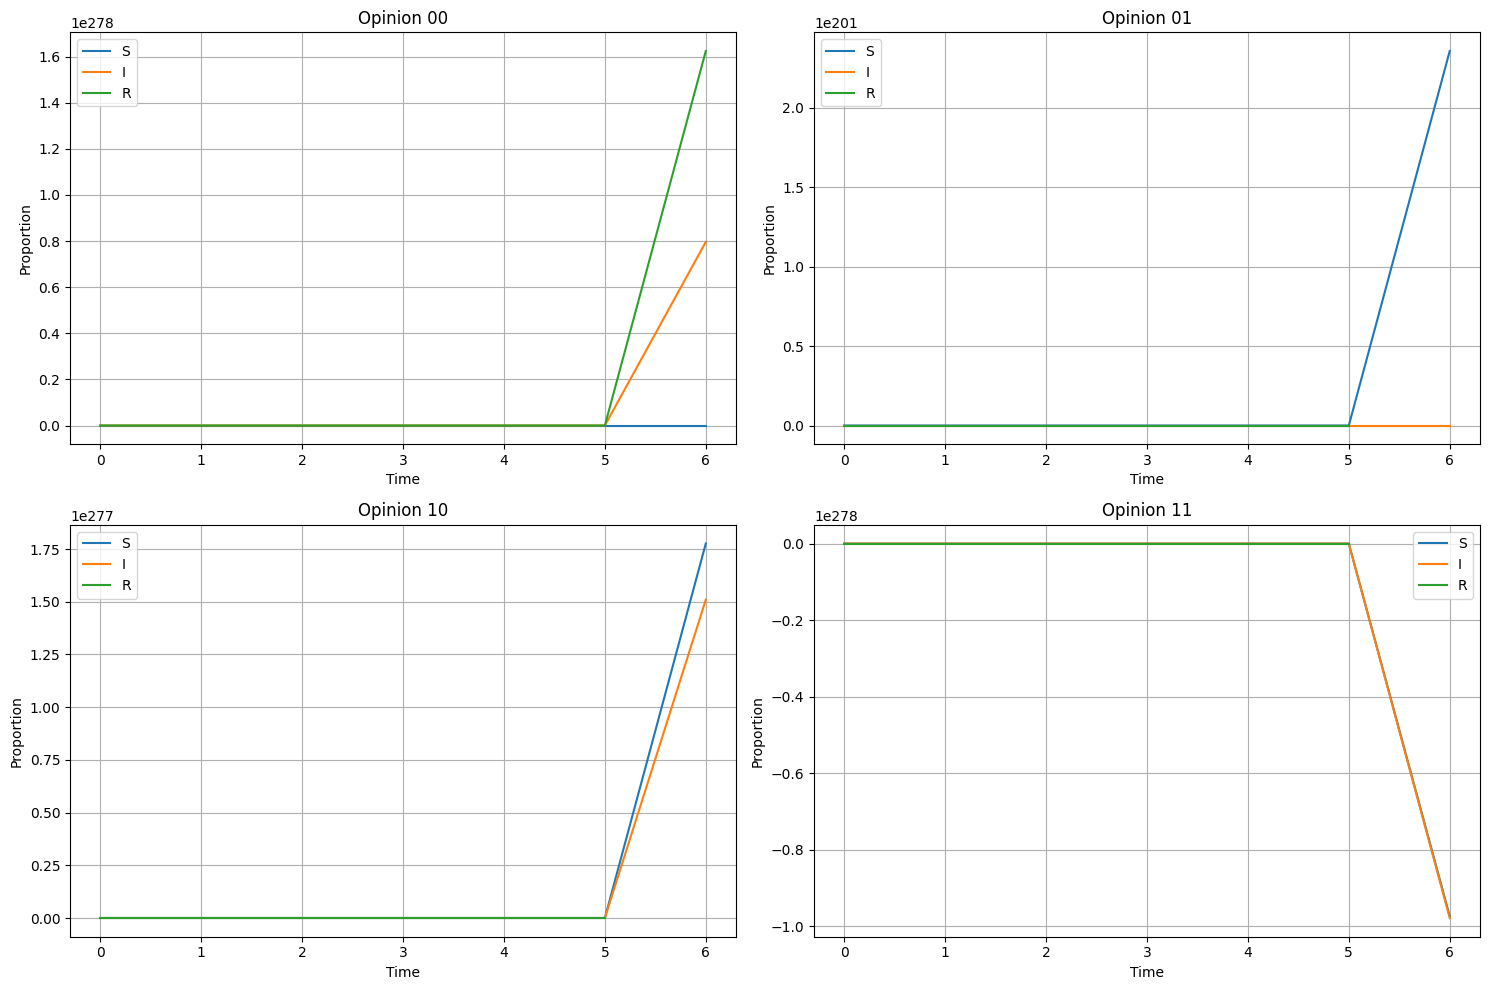

In [4]:
# Plotting
plt.figure(figsize=(15, 10))

# Plot for opinion 00
plt.subplot(2, 2, 1)
plt.plot(df.index, df['P_S_00'], label='S')
plt.plot(df.index, df['P_I_00'], label='I')
plt.plot(df.index, df['P_R_00'], label='R')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('Opinion 00')
plt.legend()
plt.grid(True)

# Plot for opinion 01
plt.subplot(2, 2, 2)
plt.plot(df.index, df['P_S_01'], label='S')
plt.plot(df.index, df['P_I_01'], label='I')
plt.plot(df.index, df['P_R_01'], label='R')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('Opinion 01')
plt.legend()
plt.grid(True)

# Plot for opinion 10
plt.subplot(2, 2, 3)
plt.plot(df.index, df['P_S_10'], label='S')
plt.plot(df.index, df['P_I_10'], label='I')
plt.plot(df.index, df['P_R_10'], label='R')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('Opinion 10')
plt.legend()
plt.grid(True)

# Plot for opinion 11
plt.subplot(2, 2, 4)
plt.plot(df.index, df['P_S_11'], label='S')
plt.plot(df.index, df['P_I_11'], label='I')
plt.plot(df.index, df['P_R_11'], label='R')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('Opinion 11')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


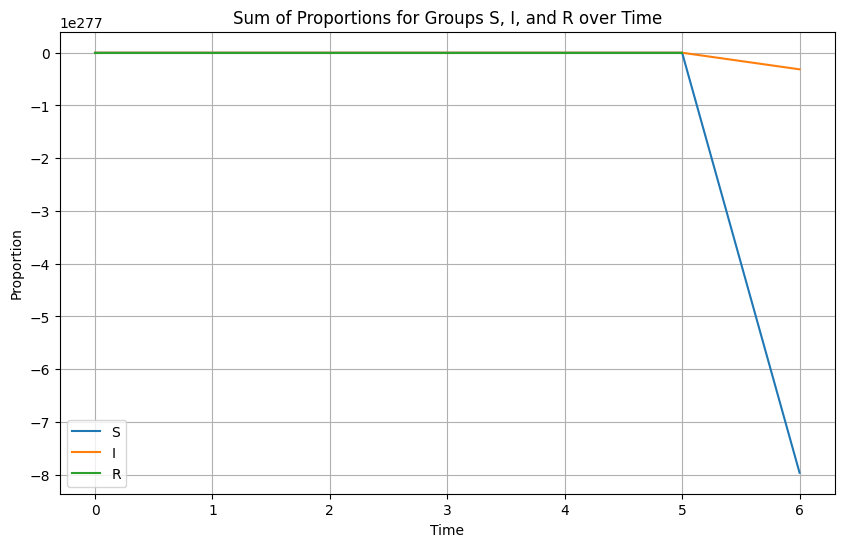

In [5]:
# Summing up proportions for each group
df['S_total'] = df['P_S_00'] + df['P_S_01'] + df['P_S_10'] + df['P_S_11']
df['I_total'] = df['P_I_00'] + df['P_I_01'] + df['P_I_10'] + df['P_I_11']
df['R_total'] = df['P_R_00'] + df['P_R_01'] + df['P_R_10'] + df['P_R_11']

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(df.index, df['S_total'], label='S')
plt.plot(df.index, df['I_total'], label='I')
plt.plot(df.index, df['R_total'], label='R')
plt.xlabel('Time')
plt.ylabel('Proportion')
plt.title('Sum of Proportions for Groups S, I, and R over Time')
plt.legend()
plt.grid(True)
plt.show()
